<a href="https://colab.research.google.com/github/aayush9753/LearningResources/blob/master/SpotAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data_path = '/content/gdrive/"My Drive"/Data/"aithon2020_level_3.zip (Unzipped Files)"'
!ls {data_path}

aithon_level_3_2020-09-22T05:11:55.txt	aithon_level_3_2020-09-22T12:01:27.txt
aithon_level_3_2020-09-22T05:31:23.txt	aithon_level_3_2020-09-22T12:31:25.txt
aithon_level_3_2020-09-22T06:01:22.txt	aithon_level_3_2020-09-22T13:01:28.txt
aithon_level_3_2020-09-22T06:31:22.txt	aithon_level_3_2020-09-22T13:32:14.txt
aithon_level_3_2020-09-22T07:01:23.txt	aithon_level_3_2020-09-22T14:01:58.txt
aithon_level_3_2020-09-22T07:31:21.txt	aithon_level_3_2020-09-22T14:31:58.txt
aithon_level_3_2020-09-22T08:01:22.txt	aithon_level_3_2020-09-22T15:31:24.txt
aithon_level_3_2020-09-22T08:31:22.txt	aithon_level_3_2020-09-22T16:01:24.txt
aithon_level_3_2020-09-22T09:01:23.txt	aithon_level_3_2020-09-22T16:31:22.txt
aithon_level_3_2020-09-22T09:31:23.txt	aithon_level_3_2020-09-22T17:01:22.txt
aithon_level_3_2020-09-22T10:01:23.txt	aithon_level_3_2020-09-22T17:31:21.txt
aithon_level_3_2020-09-22T10:31:25.txt	aithon_level_3_2020-09-22T18:01:20.txt
aithon_level_3_2020-09-22T11:01:25.txt	aithon_level_3_2020-09-22

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
files = []
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))


/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T05:11:55.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T05:31:23.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T06:31:22.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T06:01:22.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T08:31:22.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T08:01:22.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T07:31:21.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T07:01:23.txt
/content/gdrive/My Drive/Data/aithon2020_level_3.zip (Unzipped Files)/aithon_level_3_2020-09-22T09:01:23.txt
/content/gdrive/My 

In [7]:
import json
tweets = []
for i in files:
  for line in open(i,'r'):
    tweets += json.loads(line)

In [8]:
dates = []
for date in tweets:
  dates.append(date['date'])
locations = []
for location in tweets:
  locations.append(location['location'])
texts = []
for text in tweets:
  texts.append(text['text'])
timing = []
for time in tweets:
  timing.append(time['time'])

In [ ]:
texts

In [71]:
df = pd.DataFrame(dates,columns=['DATE'])
df['TIME'] = timing
df['TEXT'] = texts
df['LOCATION'] = locations

In [72]:
df.head()

,DATE,TIME,TEXT,LOCATION
0,Sep 22,05:08:45,Curve flattening? Kenya records 48 new virus c...,IN
1,Sep 22,05:08:34,Victoria and Melbourne Covid trend map: where ...,"Erbil, Iraq"
2,Sep 22,05:08:33,NSW and Sydney Covid trend map: where coronavi...,"Melbourne, Australia"
3,Sep 22,05:06:02,IT’S BAKE OFF DAY! 🙌🏼\n\nWho else will be tuni...,"Melbourne, Australia"
4,Sep 22,05:05:34,@DanielAndrewsMP The Liberal party bots are ou...,Fareham


In [73]:
len(df)

496448

In [74]:
for i in range(len(df)):
  k = df['DATE'][i][-2:]
  l = k + '/09/2020 ' + df['TIME'][i]
  df['DATE'][i] = l
  if(i%10000) == 0:
    print('+',end='')

++++++++++++++++++++++++++++++++++++++++++++++++++

In [75]:
df.head()

,DATE,TIME,TEXT,LOCATION
0,22/09/2020 05:08:45,05:08:45,Curve flattening? Kenya records 48 new virus c...,IN
1,22/09/2020 05:08:34,05:08:34,Victoria and Melbourne Covid trend map: where ...,"Erbil, Iraq"
2,22/09/2020 05:08:33,05:08:33,NSW and Sydney Covid trend map: where coronavi...,"Melbourne, Australia"
3,22/09/2020 05:06:02,05:06:02,IT’S BAKE OFF DAY! 🙌🏼\n\nWho else will be tuni...,"Melbourne, Australia"
4,22/09/2020 05:05:34,05:05:34,@DanielAndrewsMP The Liberal party bots are ou...,Fareham


In [79]:
df_new = df.copy()

In [80]:
df_new = df_new.rename(columns={'DATE': 'created_at'})

In [81]:
df_new.head()

,created_at,TIME,TEXT,LOCATION
0,22/09/2020 05:08:45,05:08:45,Curve flattening? Kenya records 48 new virus c...,IN
1,22/09/2020 05:08:34,05:08:34,Victoria and Melbourne Covid trend map: where ...,"Erbil, Iraq"
2,22/09/2020 05:08:33,05:08:33,NSW and Sydney Covid trend map: where coronavi...,"Melbourne, Australia"
3,22/09/2020 05:06:02,05:06:02,IT’S BAKE OFF DAY! 🙌🏼\n\nWho else will be tuni...,"Melbourne, Australia"
4,22/09/2020 05:05:34,05:05:34,@DanielAndrewsMP The Liberal party bots are ou...,Fareham


In [83]:
df_new = df_new.drop('TIME',axis=1)

In [84]:
df_new.head()

,created_at,TEXT,LOCATION
0,22/09/2020 05:08:45,Curve flattening? Kenya records 48 new virus c...,IN
1,22/09/2020 05:08:34,Victoria and Melbourne Covid trend map: where ...,"Erbil, Iraq"
2,22/09/2020 05:08:33,NSW and Sydney Covid trend map: where coronavi...,"Melbourne, Australia"
3,22/09/2020 05:06:02,IT’S BAKE OFF DAY! 🙌🏼\n\nWho else will be tuni...,"Melbourne, Australia"
4,22/09/2020 05:05:34,@DanielAndrewsMP The Liberal party bots are ou...,Fareham


In [92]:
df_new['created_at'] = pd.to_datetime(df_new.created_at)

In [93]:
df_new.head()

,created_at,TEXT,LOCATION
0,2020-09-22 05:08:45,Curve flattening? Kenya records 48 new virus c...,IN
1,2020-09-22 05:08:34,Victoria and Melbourne Covid trend map: where ...,"Erbil, Iraq"
2,2020-09-22 05:08:33,NSW and Sydney Covid trend map: where coronavi...,"Melbourne, Australia"
3,2020-09-22 05:06:02,IT’S BAKE OFF DAY! 🙌🏼\n\nWho else will be tuni...,"Melbourne, Australia"
4,2020-09-22 05:05:34,@DanielAndrewsMP The Liberal party bots are ou...,Fareham


In [96]:
data = df_new.copy()

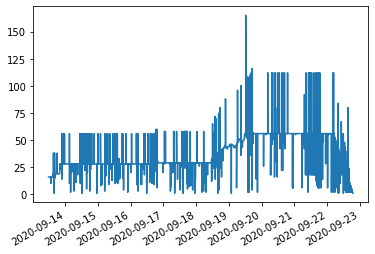

In [102]:
data.created_at.value_counts().sort_index().plot()

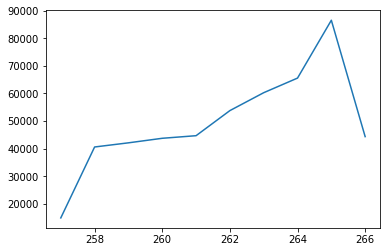

In [103]:
data.created_at.dt.dayofyear.value_counts().sort_index().plot()

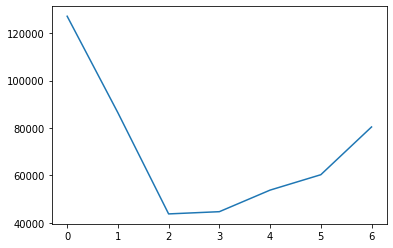

In [108]:
data.created_at.dt.dayofweek.value_counts().sort_index().plot()

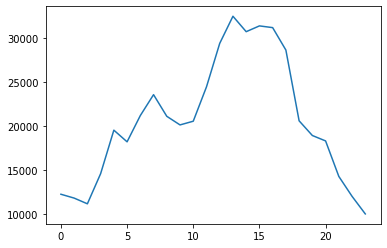

In [113]:
data.created_at.dt.hour.value_counts().sort_index().plot()

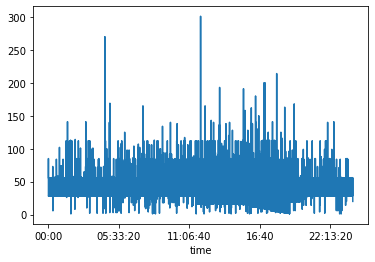

In [114]:
data.created_at.dt.time.value_counts().sort_index().plot()

In [115]:
data.head()

,created_at,TEXT,LOCATION
0,2020-09-22 05:08:45,Curve flattening? Kenya records 48 new virus c...,IN
1,2020-09-22 05:08:34,Victoria and Melbourne Covid trend map: where ...,"Erbil, Iraq"
2,2020-09-22 05:08:33,NSW and Sydney Covid trend map: where coronavi...,"Melbourne, Australia"
3,2020-09-22 05:06:02,IT’S BAKE OFF DAY! 🙌🏼\n\nWho else will be tuni...,"Melbourne, Australia"
4,2020-09-22 05:05:34,@DanielAndrewsMP The Liberal party bots are ou...,Fareham


In [116]:
data.isna().sum()

created_at    0
TEXT          0
LOCATION      0
dtype: int64

In [117]:
# data preprocessing
for i in range(data.shape[0]) :
    data['TEXT'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", data['TEXT'][i]).split()).lower()
data['TEXT'].head()

0    curve flattening kenya records 48 new virus ca...
1    victoria and melbourne covid trend map where c...
2    nsw and sydney covid trend map where coronavir...
3    it s bake off day who else will be tuning in a...
4    the liberal party bots are out in force even t...
Name: TEXT, dtype: object

In [119]:
dataset = data.copy()

In [120]:
dataset.to_csv ('dataset.csv')

Text(0.5, 1.0, 'No. of Tweets per Hour')

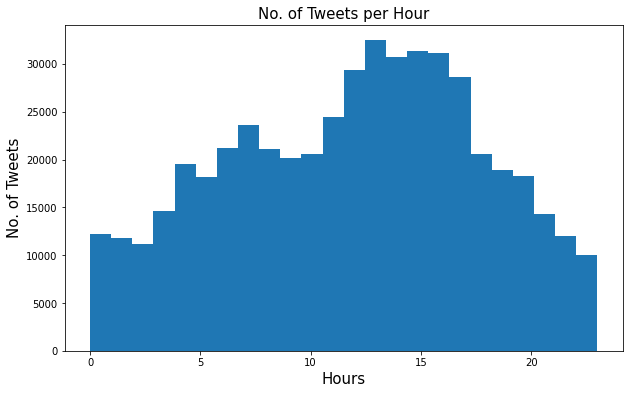

In [133]:
plt.figure(1, figsize=(10,6))
plt.hist(dataset["created_at"].dt.hour,bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

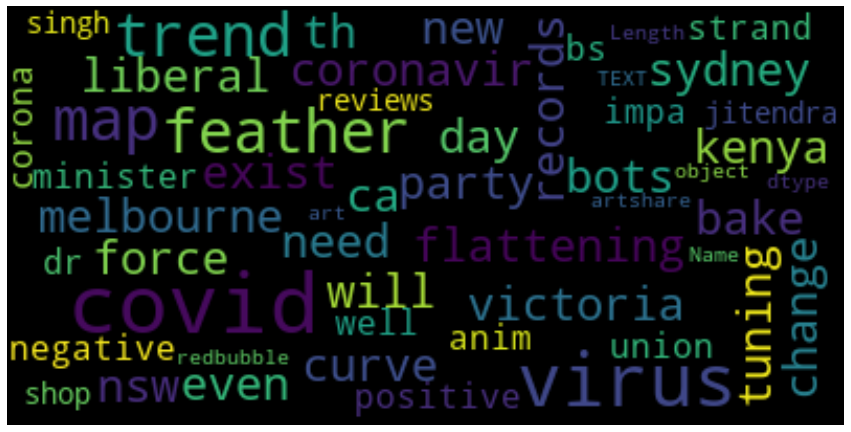

In [134]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(dataset['TEXT'])

In [135]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [136]:
#Removing Stop Words
dataset['TEXT'] = dataset['TEXT'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
dataset['TEXT'].head() 

0    curve flattening kenya records 48 new virus ca...
1    victoria melbourne covid trend map coronavirus...
2    nsw sydney covid trend map coronavirus cases r...
3    s bake day will tuning 8pm recently read reall...
4    liberal party bots force even though s even co...
Name: TEXT, dtype: object

In [ ]:
dataset['sentiment'] = ' '
dataset['polarity'] = None
for i,tweets in enumerate(dataset.TEXT) :
    blob = TextBlob(tweets)
    dataset['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        dataset['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        dataset['sentiment'][i] = 'negative'
    else :
        dataset['sentiment'][i] = 'neutral'

In [140]:
dataset.tail()

,created_at,TEXT,LOCATION,sentiment,polarity
496443,2020-09-19 16:31:50,covid exist need change title coronavirus s al...,Canada,positive,0.25
496444,2020-09-19 16:31:02,positive well negative impacts covid 19 pandem...,,positive,0.0924242
496445,2020-09-19 16:31:00,bs corona virus strand virus animal humans som...,Global,positive,0.4
496446,2020-09-19 16:30:46,union minister dr jitendra singh reviews covid...,"Grove City, OH",neutral,0
496447,2020-09-19 16:30:40,feathers shop feather redbubble art artshare a...,"Srinagar, Kashmir",neutral,0


positive    224537
neutral     156286
negative    115625
Name: sentiment, dtype: int64


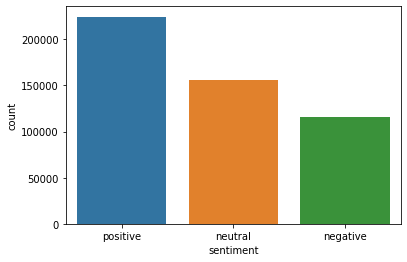

In [144]:
print(dataset.sentiment.value_counts())
sns.countplot(x='sentiment', data = dataset);

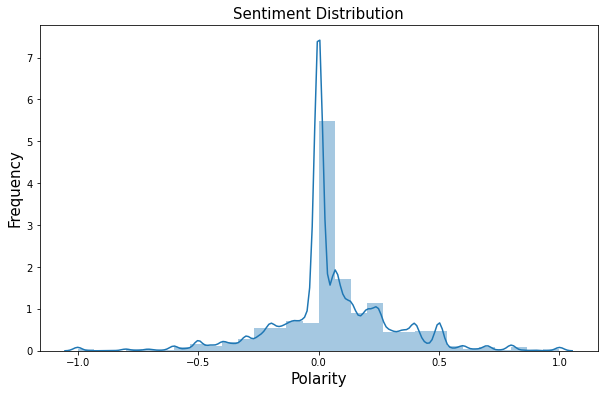

In [145]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

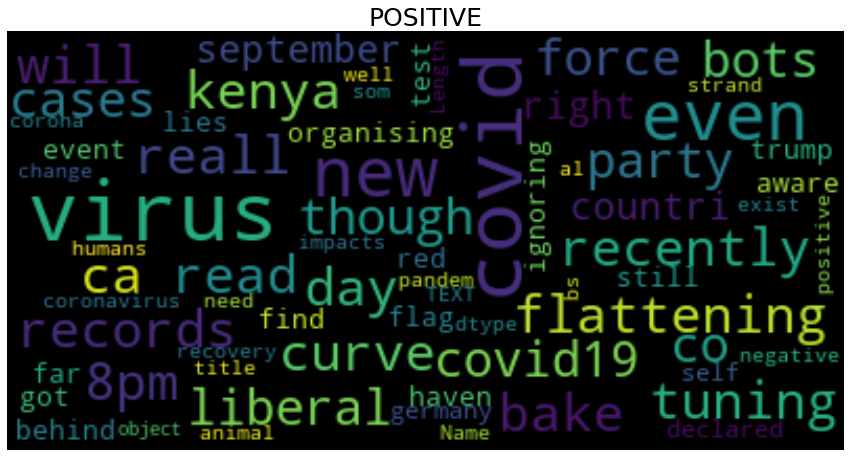

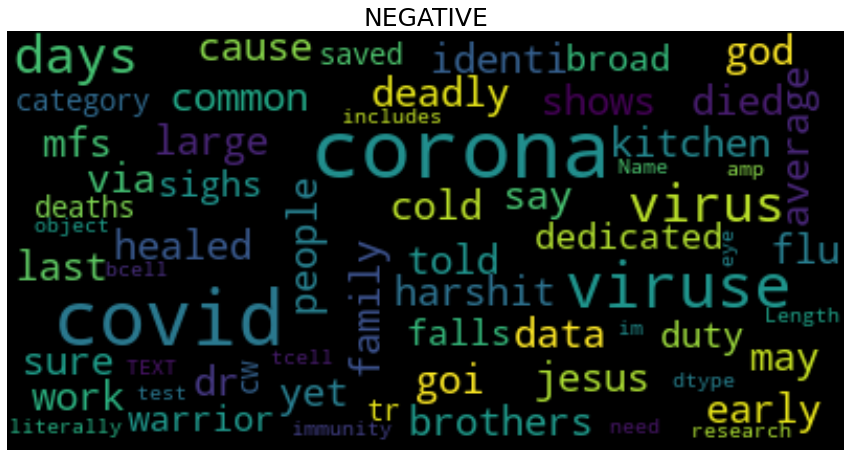

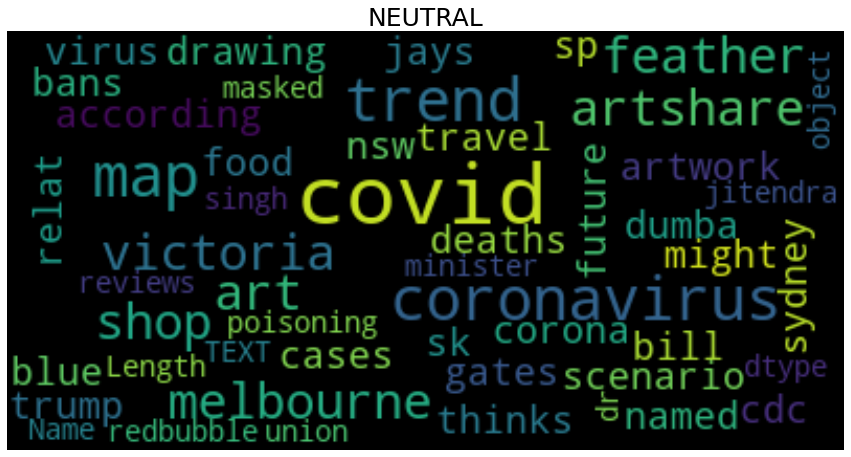

In [147]:
pos = dataset['TEXT'][dataset['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = dataset['TEXT'][dataset['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = dataset['TEXT'][dataset['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

Most frequently appearing words

In [149]:
words = []
words = [word for i in dataset.TEXT for word in i.split()]

In [150]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,covid,528760
1,corona,510135
2,19,281683
3,virus,149124
4,coronavirus,132637


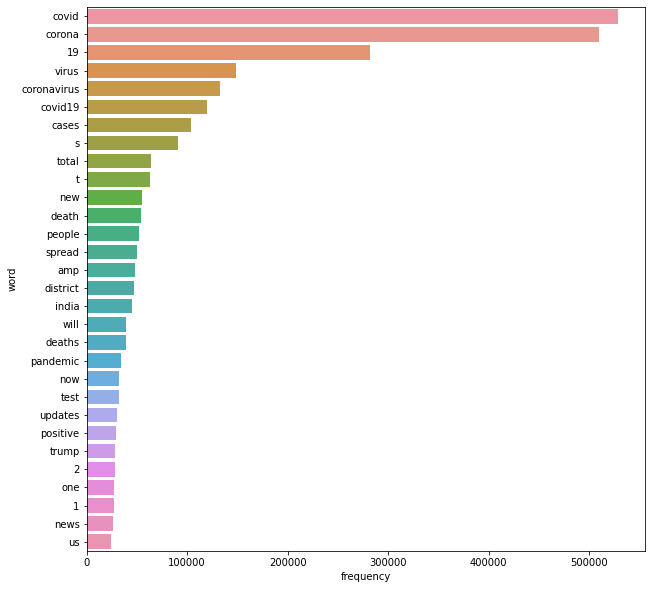

In [151]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);